In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("Campus.csv")
# df.head()
#df.tail()
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

**Data understanding**

In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


**Data visualisation**

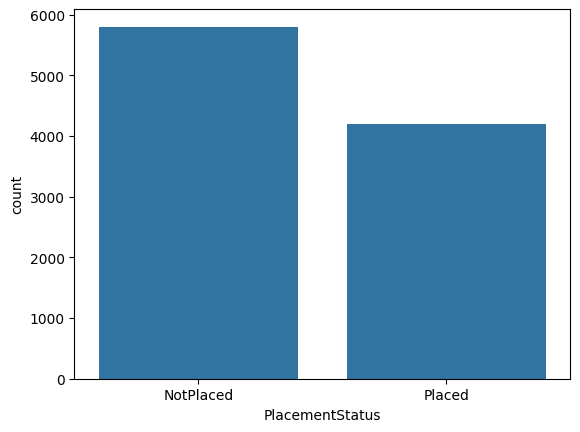

In [9]:
sns.countplot(x='PlacementStatus', data=df)
plt.show()
#Placement Distribution

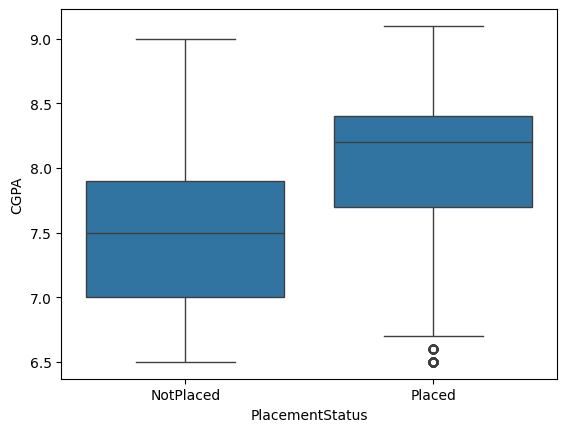

In [10]:
sns.boxplot(x='PlacementStatus', y='CGPA', data=df)
plt.show()
#CGPA Vs PLACEMENT

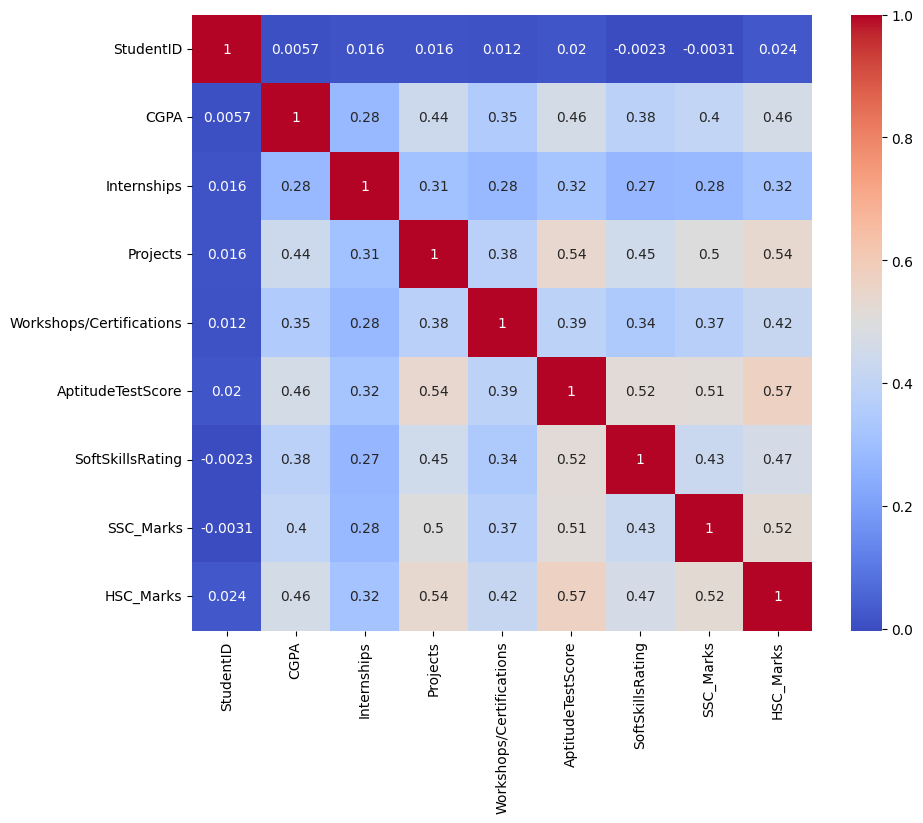

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

**Feature and target**

In [12]:
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']

**Train test split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

**Scaling**

In [14]:
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes':1, 'No':0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes':1, 'No':0})
# converted into numeric

In [15]:
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Models training**

In [16]:
# 1 LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, lr_pred))
# It is a linear classification algorithm used for binary problems like placed vs not placed.
# It predicts the probability of a student getting placed using a sigmoid function.

Logistic Accuracy: 0.7935


In [20]:
# DECISION TREES
pt = DecisionTreeClassifier()
pt.fit(X_train, y_train)
pt_pred = pt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, pt_pred))
# It is a tree-based model that makes decisions by splitting data based on feature conditions.
# It is easy to interpret but can overfit if the tree becomes too deep.

Decision Tree Accuracy: 0.7225


In [18]:
#3 RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
# It is an ensemble method that builds multiple decision trees and combines their results.
# It reduces overfitting and usually provides higher accuracy than a single decision tree.

Random Forest Accuracy: 0.784


In [19]:
#4 svm
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
# It finds the optimal boundary (hyperplane) that separates two classes with maximum margin.
# It works well for complex datasets and high-dimensional feature spaces.

SVM Accuracy: 0.795


**K- fold cross validation**

In [21]:
models = [lr, dt, rf, svm]

for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(model.__class__.__name__, "CV Score:", scores.mean())
#     It splits the dataset into K equal parts, trains on K-1 parts, and tests on the remaining part.
# This process repeats K times to give a more reliable and unbiased performance estimate.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression CV Score: 0.7604
DecisionTreeClassifier CV Score: 0.6639
RandomForestClassifier CV Score: 0.7652000000000001
SVC CV Score: 0.5803


**Hyper parameter tuning (ramdom forest)**

In [22]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)
# It is the process of finding the best parameter values (like number of trees or depth) for a model.
# Techniques like GridSearchCV try multiple combinations to improve model performance.

Best Params: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.799


**Confusion matrix **

Logistic Regression Accuracy: 0.7935


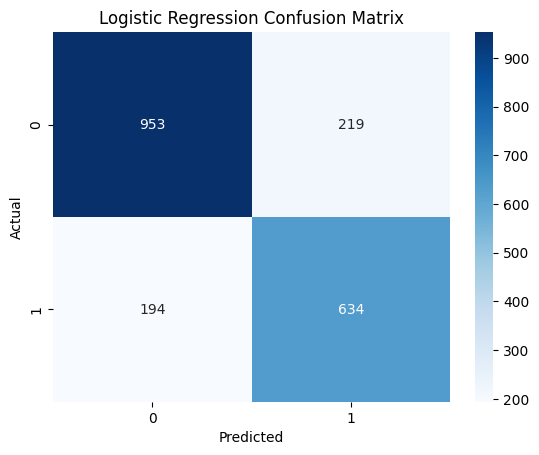

Classification Report:
               precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1172
      Placed       0.74      0.77      0.75       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [23]:
# Prediction
lr_pred = lr.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, lr_pred))

Random Forest Accuracy: 0.784


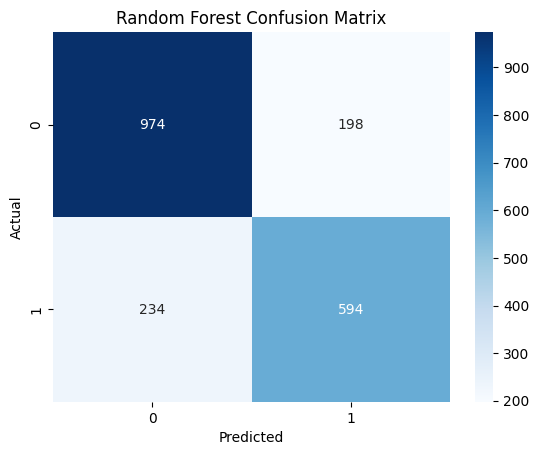

Classification Report:
               precision    recall  f1-score   support

   NotPlaced       0.81      0.83      0.82      1172
      Placed       0.75      0.72      0.73       828

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [24]:
# Prediction
rf_pred = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, rf_pred))

**Features importance**

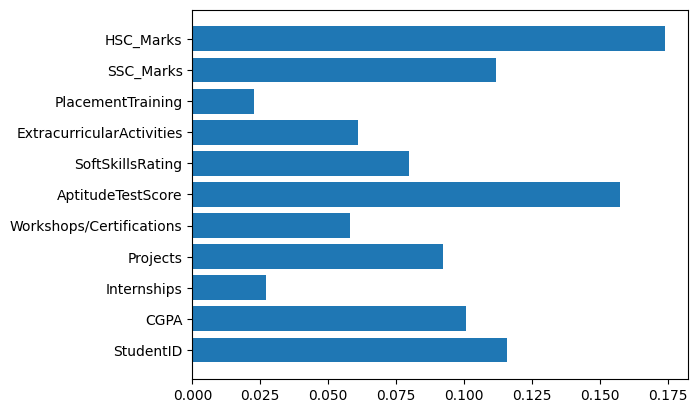

In [25]:
plt.barh(X.columns, rf.feature_importances_)
plt.show()

**Bar graph comparing all models**

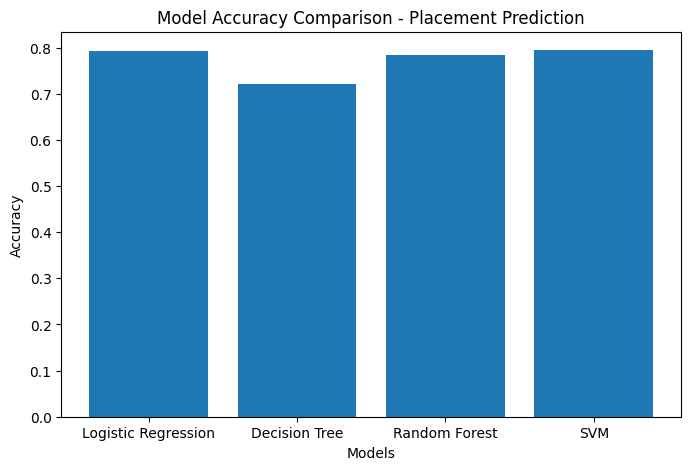

Logistic Regression : 0.7935
Decision Tree : 0.7205
Random Forest : 0.784
SVM : 0.795


In [26]:
# Store accuracies
lr_acc = accuracy_score(y_test, lr.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Create dictionary
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [lr_acc, dt_acc, rf_acc, svm_acc]

# Plot bar graph
plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison - Placement Prediction")
plt.show()

# Print values
for model, acc in zip(models, accuracies):
    print(model, ":", acc)

**Save moodel**

In [27]:
import pickle
pickle.dump(rf, open("placement_model.pkl", "wb"))